# Movie Recommendation System

### Python Libraries For Data Science

1.Matplotlib
2.SciKit-Learn 
3.NumPy
4.SeaBorn
5.Pandas
6.SciPy

SciKit-Learn 
-built on the above modules
-Hub of ML algorithms
-KNN, MLP, Decision Tree are a few
-depends on the end goal of the project
-model fitting, training, validation 

#### What exactly is a movie recommendation system?


Youtube, Spotify and Netflix suggest relevent content based on data.
This is called Collaborative and Content based Filtering. 

##### Types of recommendations:


We are trying to derive results based on similarities between users and contents. 

###### 1. User based collaborative filtering 

Find out similarity score between the two users, based on which the recommendations would be given out.

###### 2. Item based collaborative filters

Find out the similarity between different products is calculated based on the attributes of the product from which the recommendations would be given out.

Eg: Genre, actor of the movie etc.

### About the data set:

Source: Data lens
1,00,836 ratinings
3683 tags in the reviews
9742 movies

The data was created by 932 user.
All Users are represented by an id.

#### Importing Libraries

In [116]:
import numpy as np
import pandas as pd

#### Getting the Data

u-data file contains data about the user-id, the item-id, the rating given to the movie and the timestamp.

u-item file contains data of the movie-id, the movie-name and the year of release.

In [117]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movies= pd.read_csv('u-data.data', sep='\t', names = column_names)
movies

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [136]:
column_names = ['item_id','title']
movies_2 = pd.read_csv('u-item.csv', names=column_names, encoding='latin-1')

##movies_2= pd.read_csv('u-item.csv', names=column_names)

In [137]:
movies_2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We have to merge these two dataset into one.

In [138]:
data = pd.merge(movies, movies_2, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [139]:
data.sort_values(by='item_id')

,user_id,item_id,rating,timestamp,title
3732,805,1,4,881695527,Toy Story (1995)
3759,124,1,3,890287733,Toy Story (1995)
3760,882,1,5,879864558,Toy Story (1995)
3761,779,1,4,875501555,Toy Story (1995)
3762,542,1,4,886532534,Toy Story (1995)
...,...,...,...,...,...
99958,863,1678,1,889289570,Mat' i syn (1997)
99938,863,1679,3,889289491,B. Monkey (1998)
99965,863,1680,2,889289570,Sliding Doors (1998)
99984,896,1681,3,887160722,You So Crazy (1994)


### Exploratory Data Analysis

Let us Explore the data and look at some of the movies and their ratings. 

#### Importing Visualisation libraries

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let us look at the average ratings of these movies

In [142]:
average_ratings = pd.DataFrame(data.groupby('title')['rating'].mean().sort_values(ascending=False))
average_ratings.head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


Let us look at the number of ratings of these movies

In [141]:
total_count = pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=False))
total_count.head()

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [143]:
ratings = pd.merge(average_ratings,total_count,on='title')
ratings.columns = ['average','count']
ratings.head()

,average,count
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


Histograms:

Text(0.5, 0, 'number of time a movie was rated')

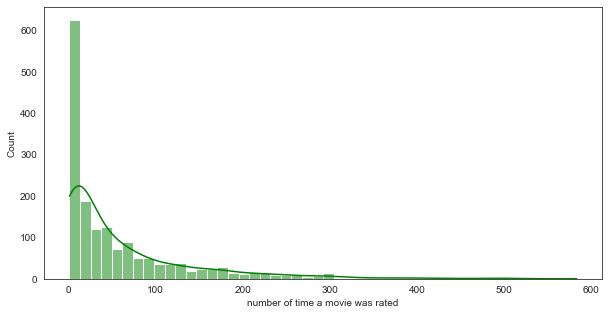

In [144]:
plt.figure(figsize=(10,5))
ax = sns.histplot(ratings['count'],bins='auto', kde=True, color='green')
plt.xlabel('number of time a movie was rated')

The histogram is right skewed. 
Most of the data is clustered to the right side. 
The above histograme represents the number of times a movie was rated and the count's frequency. Maximum number of times a movie rated falls between 0 - 10.

Text(0.5, 0, 'Average ratings for each movie')

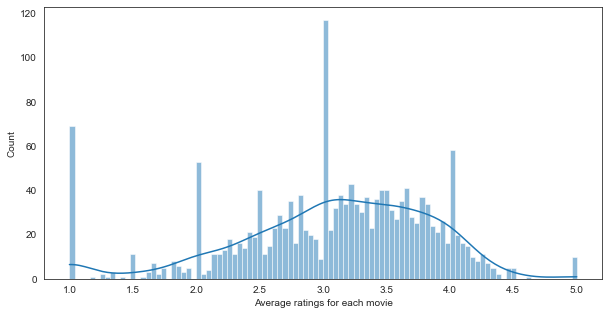

In [112]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['average'], bins=100, kde=True)
plt.xlabel('Average ratings for each movie')

The above histograme represents the frequency of the average ratings given to movies. Most movies have been rated 3.0 on an average. There are some outliers in 

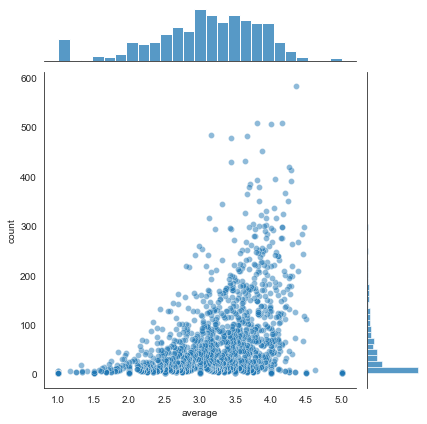

In [145]:
sns.jointplot(x=ratings['average'],y=ratings['count'],alpha=0.5)

#### Recommending Similar Movies

We will be creating a movie matrix where a user has rated for different movies. There will be a lot of NaN values because not all users have rated all the movies in the list. 

In [146]:
movie_matrix= data.pivot_table(index='user_id',columns='title',values='rating')
movie_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


#### Creating user input 



In [166]:
movie = input('Please enter the movie you liked : ')
movie_ratings = movie_matrix[movie]
movie_ratings.head()

Please enter the movie you liked : 2001: A Space Odyssey (1968)


user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: 2001: A Space Odyssey (1968), dtype: float64

#### Finding Correlation with the other movies suggested by the user.

Here we will find the correlation and sort it by the high correlation value.

In [167]:
corr = movie_matrix.corrwith(movie_ratings)
corr_recom = pd.DataFrame(corr.dropna(),columns=['Correlation'])
corr_recom = corr_recom.join(ratings['count'])
corr_recom.sort_values(by='Correlation', ascending=False).head(10)

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
title,,
Faithful (1996),1.0,10
"Good Man in Africa, A (1994)",1.0,2
Dream With the Fishes (1997),1.0,7
Switchback (1997),1.0,17
2001: A Space Odyssey (1968),1.0,259
Deep Rising (1998),1.0,14
Midnight Dancers (Sibak) (1994),1.0,5
Selena (1997),1.0,16
Safe Passage (1994),1.0,2


After finding the correlation data, we filter out the movies that have more than 80 ratings from the users.

In [168]:
recommend = corr_recom[corr_recom['count']>80].sort_values('Correlation',ascending=False)
top_5 = recommend[1:6]

In [170]:
print('The suggested movies are: ')
for i in range(len(top_5)):
    print (top_5.index[i])

print('\nEnjoy your movies :)')

The suggested movies are: 
True Romance (1993)
Natural Born Killers (1994)
Being There (1979)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
Clockwork Orange, A (1971)

Enjoy your movies :)
